In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Загрузка данных
data = pd.read_csv('../datasets/MarketingCompaign.csv')

# Уменьшение выборки до 2000 строк
data = data.head(2000)

data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,TotalSpendings,Children,PlaceSpendings,Accepting_Cmps,MonthEnrollment,Partners,Single,AdvanceEducation,Basic,Graduation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,1617,0,25,0,129,0,1,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,27,2,6,0,101,0,1,0,0,1
2,4141,1965,Graduation,Partners,71613.0,0,0,2013-08-21,26,426,...,776,0,21,0,113,1,0,0,0,1
3,6182,1984,Graduation,Partners,26646.0,1,0,2014-10-02,26,11,...,53,1,8,0,99,1,0,0,0,1
4,5324,1981,AdvanceEducation,Partners,58293.0,1,0,2014-01-19,94,173,...,422,1,19,0,108,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4954,1956,Graduation,Partners,48195.0,1,1,2014-01-21,53,106,...,265,2,17,0,108,1,0,0,0,1
1996,7861,1952,AdvanceEducation,Partners,77027.0,0,1,2014-05-02,23,820,...,1175,1,19,0,104,1,0,1,0,0
1997,4837,1965,AdvanceEducation,Partners,71322.0,0,1,2013-02-16,57,753,...,1305,1,28,0,119,1,0,1,0,0
1998,9423,1979,AdvanceEducation,Partners,32765.0,1,0,2014-02-23,49,13,...,46,1,8,0,107,1,0,1,0,0


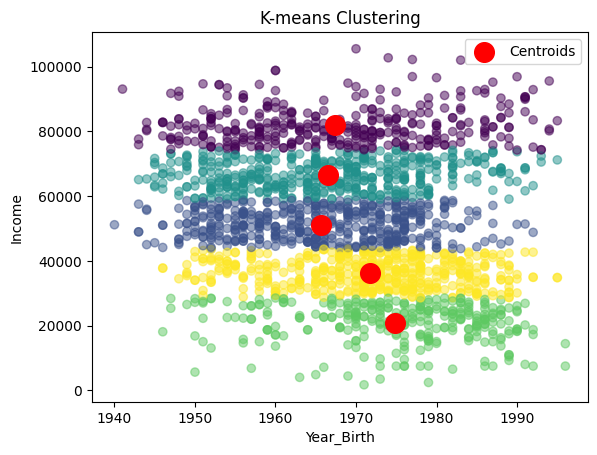

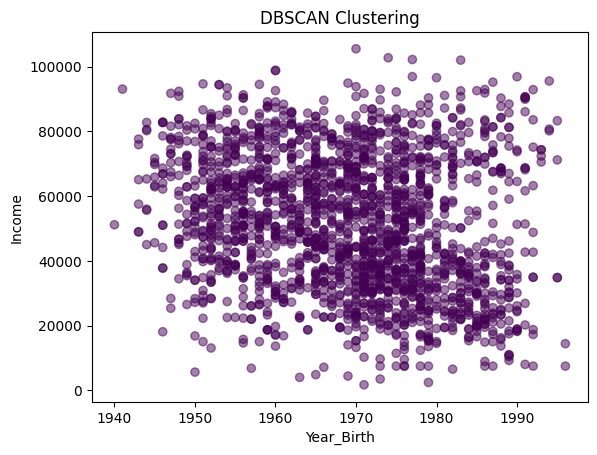

In [2]:
# Предобработка данных
# Например, заполнение пропущенных значений
data.fillna(0, inplace=True)

# Выбор признаков для кластеризации
features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = data[features].values

# Реализация K-means
def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)
        
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids.copy()
    
    return clusters, centroids

# Применение K-means
k = 5  # Количество кластеров
kmeans_clusters, kmeans_centroids = kmeans(X, k)

# Визуализация результатов для K-means
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='o', c='red', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.xlabel('Year_Birth')
plt.ylabel('Income')
plt.show()

# Реализация DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Визуализация результатов для DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Year_Birth')
plt.ylabel('Income')
plt.show()

# Сравнение алгоритмов и выводы
# Анализ кластеров, сравнение их характеристик и особенностей